In [ ]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [10]:
df = pd.read_csv("high_diamond_ranked_10min.csv")
df.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [ ]:
df.info()


<AxesSubplot:>

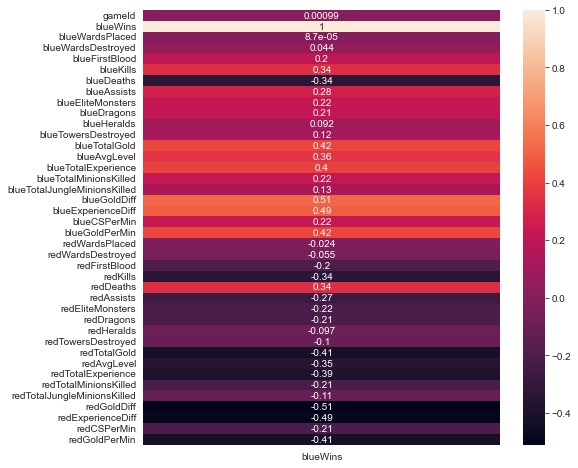

In [5]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr()[['blueWins']], annot=True)


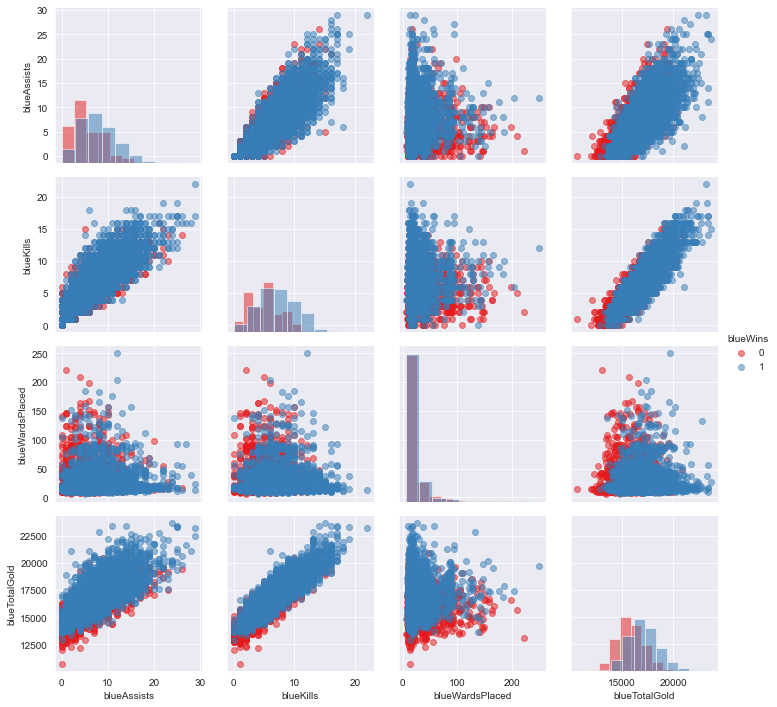

In [6]:
g = sns.PairGrid(data=df, vars=[
                 'blueAssists', 'blueKills', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', palette='Set1')
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.5)
g.add_legend()


<AxesSubplot:xlabel='blueGoldDiff', ylabel='Count'>

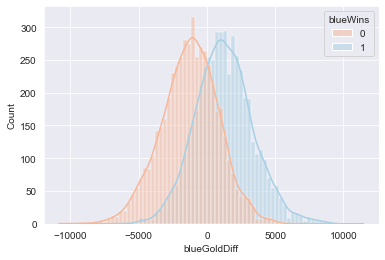

In [7]:
sns.histplot(x='blueGoldDiff', data=df,
             hue='blueWins', palette='RdBu', kde=True)


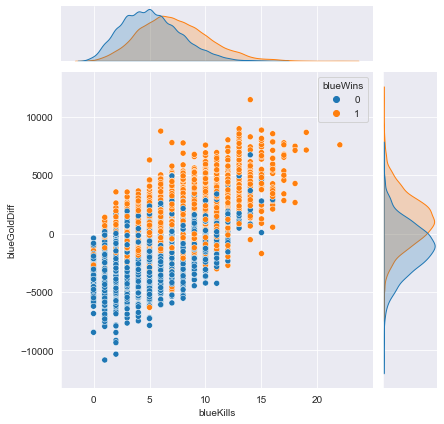

In [8]:
sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins')


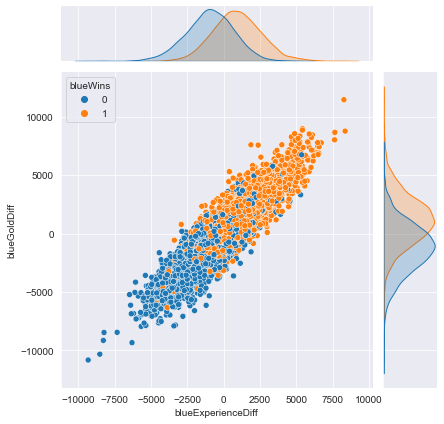

In [9]:
sns.jointplot(x='blueExperienceDiff', y='blueGoldDiff',
              data=df, hue='blueWins')


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_13272\576374800.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(5, 5))


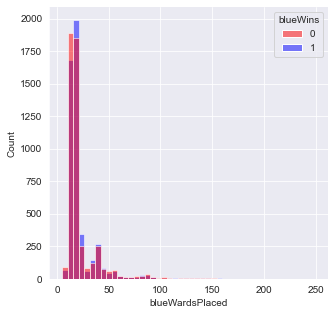

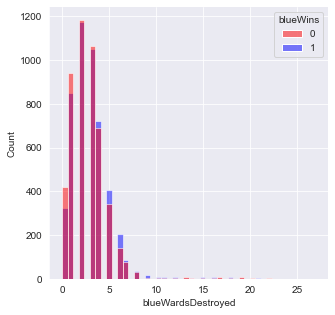

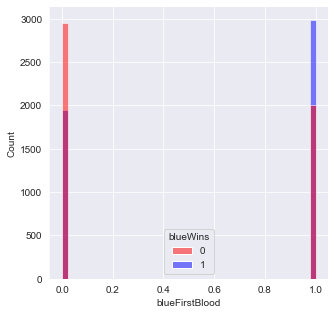

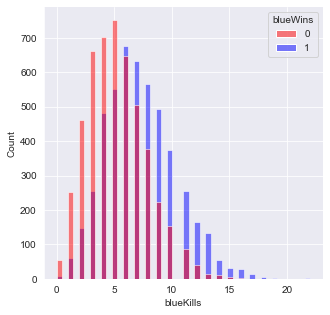

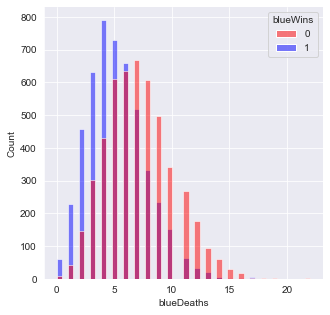

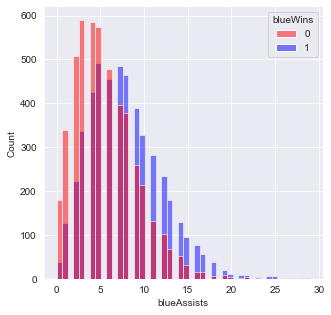

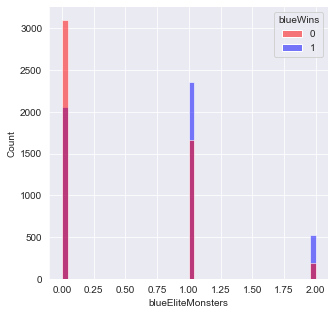

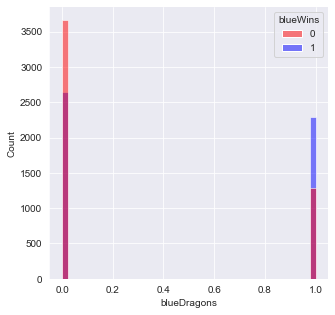

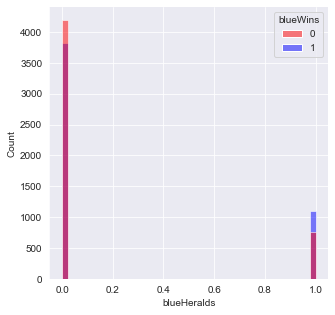

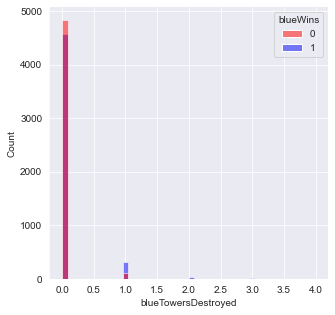

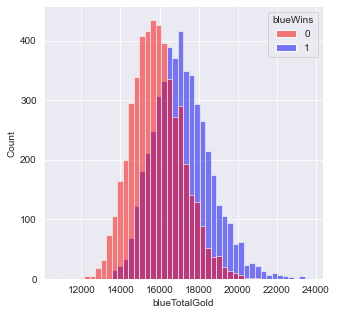

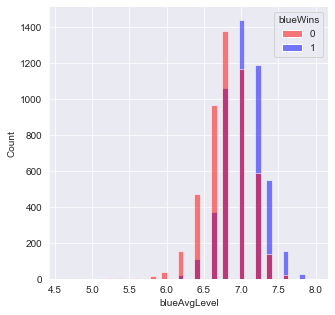

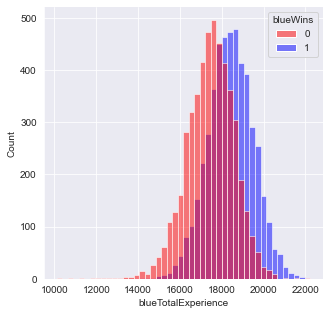

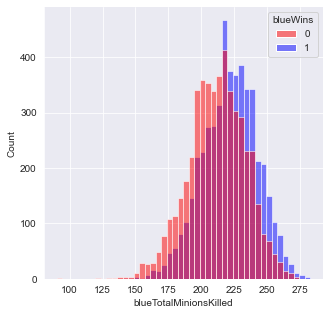

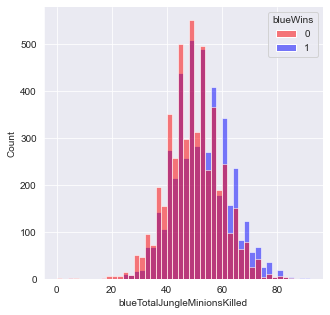

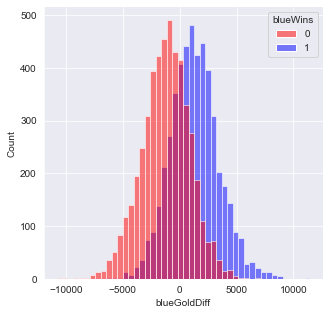

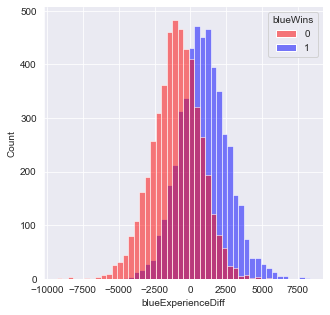

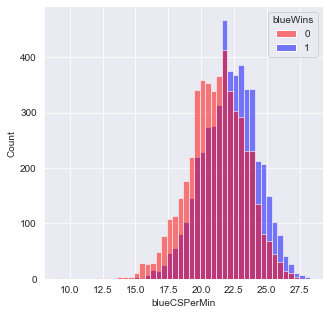

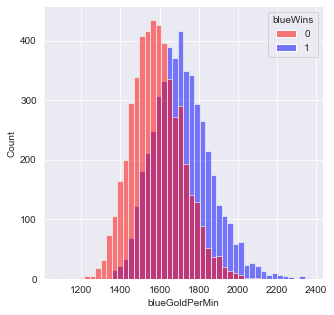

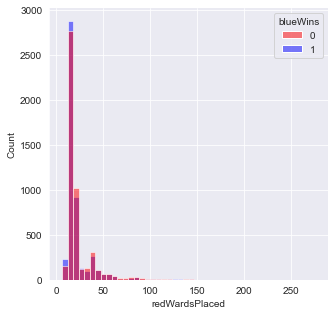

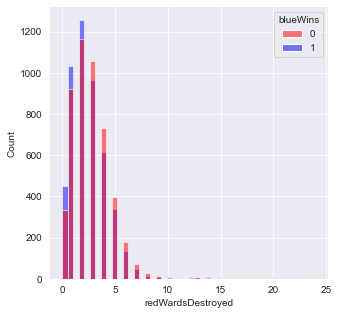

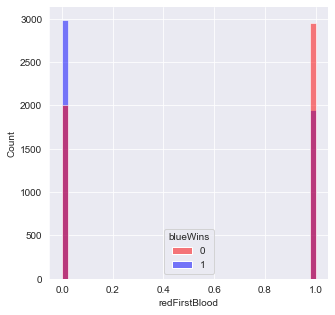

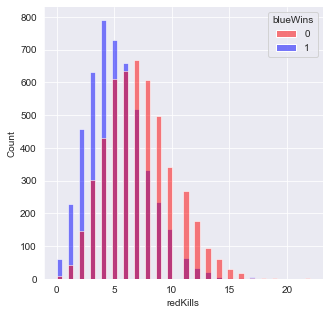

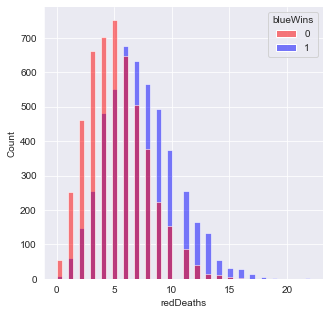

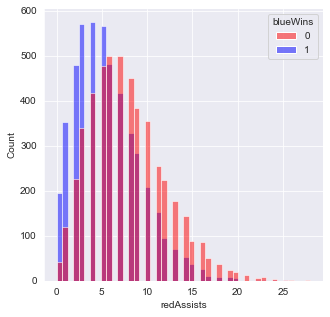

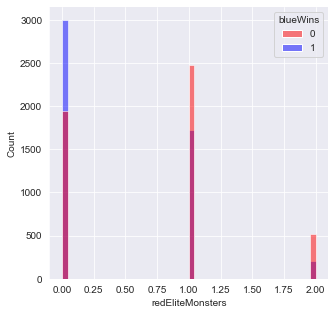

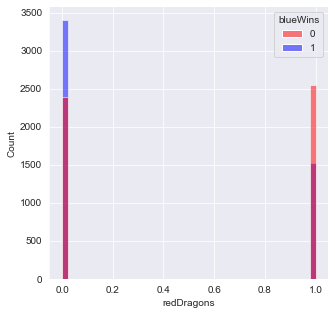

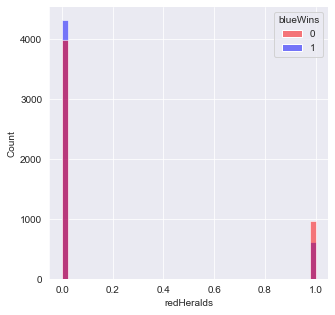

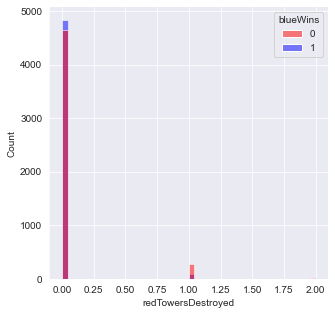

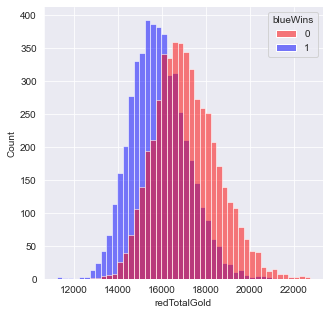

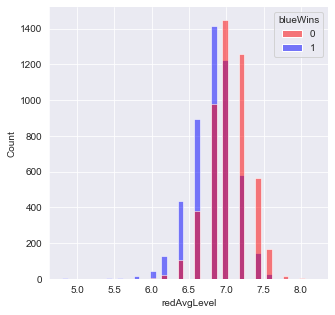

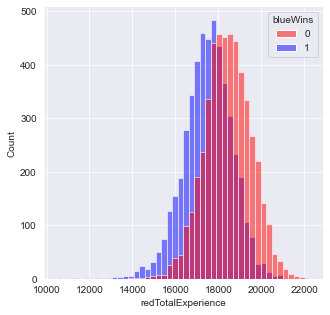

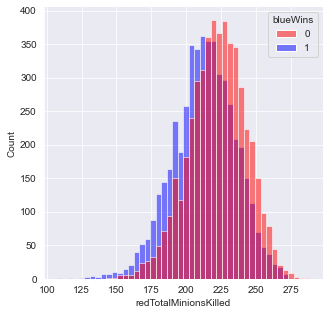

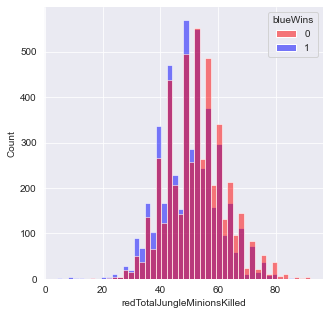

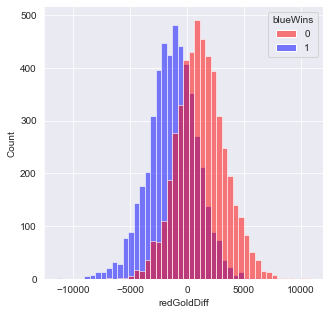

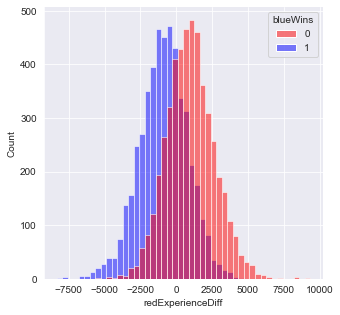

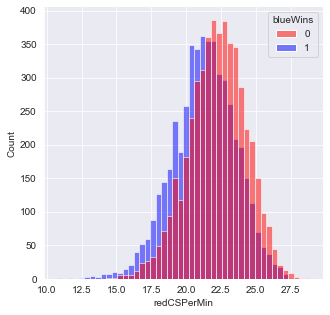

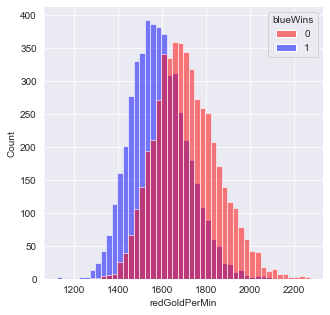

In [12]:
for col in df.columns:
  if col != "blueWins" and col != "gameId":
    fig, ax1 = plt.subplots(figsize=(5, 5))
    sns.histplot(x=col, hue='blueWins', data=df, ax=ax1,
                 bins=46, palette=["#FF0000", "#0000FF"])
    sns.despine(fig)
